## Analisis cercania Fenilalanina 153

un codigo que haga un diccionario donde salga la distancia en angstrom de todos los modelos generados, no solo los del cluster mayor donde salga la distancia desde la F153 al ligando 


In [74]:
######### INPUT DATA ###########
'''
#PLI
MBII-ethoxysanguinarine
MBIII-ethoxysanguinarine
MBIIyIII-ethoxysanguinarine

MBII-withaferin_A
MBIII-withaferin_A
MBIIyIII-withaferin_A

#PPI
P01106-Q9BZ95_MBII_200
P01106-Q9BZ95_MBIII_200
P01106-Q9BZ95_MBIIyIII_200
'''
state = 'MBII-withaferin_A' # modificar al usar
relative_path = f'../models/boltz_results_{state}/predictions/{state}/{state}_model_*.pdb'
data_path = f'../data/{state}/'
relative_path

'../models/boltz_results_MBII-withaferin_A/predictions/MBII-withaferin_A/MBII-withaferin_A_model_*.pdb'

In [75]:
import mdtraj as md
import glob
import numpy as np

pdb_files = sorted(glob.glob(relative_path))

# Cargar como trayectoria
traj = md.load(pdb_files, top=pdb_files[0])

# Superposición al primer modelo (para comparación RMSD)
traj.superpose(traj[0])

<mdtraj.Trajectory with 200 frames, 770 atoms, 101 residues, without unitcells at 0x7b32becc0a50>

In [76]:
import mdtraj as md
# Access the topology object
topology = traj.topology

# Extract and print the sequence
sequence = []
for residue in topology.residues:
    sequence.append(residue.name)

# Join the residue names to form a sequence string
sequence_string = "-".join(sequence)

print("Sequence of the trajectory:")
print(sequence_string)

Sequence of the trajectory:
ASP-ASN-ASP-GLY-GLY-GLY-GLY-SER-PHE-SER-THR-ALA-ASP-GLN-LEU-GLU-MET-VAL-THR-GLU-LEU-LEU-GLY-GLY-ASP-MET-VAL-ASN-GLN-SER-PHE-ILE-CYS-ASP-PRO-ASP-ASP-GLU-THR-PHE-ILE-LYS-ASN-ILE-ILE-ILE-GLN-ASP-CYS-MET-TRP-SER-GLY-PHE-SER-ALA-ALA-ALA-LYS-LEU-VAL-SER-GLU-LYS-LEU-ALA-SER-TYR-GLN-ALA-ALA-ARG-LYS-ASP-SER-GLY-SER-PRO-ASN-PRO-ALA-ARG-GLY-HIS-SER-VAL-CYS-SER-THR-SER-SER-LEU-TYR-LEU-GLN-ASP-LEU-SER-ALA-ALA-LIG


In [77]:
sequence = [3, 7, 2, 9, 5]
max_val = max(sequence)              # 9
max_index = sequence.index(max_val)  # 3


In [78]:
#Fenilalanina 53

In [79]:
for i, res in enumerate(topology.residues):
    print(f"Index: {i}, resSeq: {res.resSeq}, name: {res.name}, chain index: {res.chain.index}")

Index: 0, resSeq: 1, name: ASP, chain index: 0
Index: 1, resSeq: 2, name: ASN, chain index: 0
Index: 2, resSeq: 3, name: ASP, chain index: 0
Index: 3, resSeq: 4, name: GLY, chain index: 0
Index: 4, resSeq: 5, name: GLY, chain index: 0
Index: 5, resSeq: 6, name: GLY, chain index: 0
Index: 6, resSeq: 7, name: GLY, chain index: 0
Index: 7, resSeq: 8, name: SER, chain index: 0
Index: 8, resSeq: 9, name: PHE, chain index: 0
Index: 9, resSeq: 10, name: SER, chain index: 0
Index: 10, resSeq: 11, name: THR, chain index: 0
Index: 11, resSeq: 12, name: ALA, chain index: 0
Index: 12, resSeq: 13, name: ASP, chain index: 0
Index: 13, resSeq: 14, name: GLN, chain index: 0
Index: 14, resSeq: 15, name: LEU, chain index: 0
Index: 15, resSeq: 16, name: GLU, chain index: 0
Index: 16, resSeq: 17, name: MET, chain index: 0
Index: 17, resSeq: 18, name: VAL, chain index: 0
Index: 18, resSeq: 19, name: THR, chain index: 0
Index: 19, resSeq: 20, name: GLU, chain index: 0
Index: 20, resSeq: 21, name: LEU, chain

In [80]:
# Get residue objects by index
res53 = topology.residue(53)
lig = topology.residue(100)

# Get atom indices for each residue
atoms_res53 = [atom.index for atom in res53.atoms]
atoms_lig = [atom.index for atom in lig.atoms]

print(f"Atoms in residue 53 ({res53.name} {res53.resSeq}):", atoms_res53)
print(f"Atoms in residue 100 ({lig.name} {lig.resSeq}):", atoms_lig)


Atoms in residue 53 (PHE 54): [397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407]
Atoms in residue 100 (LIG 1): [736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769]


In [82]:
# Check atoms in residue 53
print("Residue 53 atoms:")
for atom in topology.residue(53).atoms:
    print(f"{atom.name} (index {atom.index})")

# Check atoms in residue 100
print("\nligand:")
for atom in topology.residue(100).atoms:
    print(f"{atom.name} (index {atom.index})")


Residue 53 atoms:
N (index 397)
CA (index 398)
C (index 399)
O (index 400)
CB (index 401)
CG (index 402)
CD1 (index 403)
CD2 (index 404)
CE1 (index 405)
CE2 (index 406)
CZ (index 407)

ligand:
C51 (index 736)
C49 (index 737)
C48 (index 738)
C52 (index 739)
O41 (index 740)
C45 (index 741)
O39 (index 742)
O43 (index 743)
C71 (index 744)
C65 (index 745)
C55 (index 746)
C66 (index 747)
C56 (index 748)
C54 (index 749)
C64 (index 750)
C62 (index 751)
C61 (index 752)
C72 (index 753)
O44 (index 754)
C69 (index 755)
C70 (index 756)
O42 (index 757)
C50 (index 758)
C47 (index 759)
C46 (index 760)
O40 (index 761)
C67 (index 762)
C57 (index 763)
C63 (index 764)
C53 (index 765)
C59 (index 766)
C68 (index 767)
C58 (index 768)
C60 (index 769)


In [83]:
import numpy as np

# Get the CA atom index of residue 53
res53_CA = [atom.index for atom in topology.residue(53).atoms if atom.name == 'CA'][0]

# Get all atom indices of residue 100 (ligand)
res100_atoms = [atom.index for atom in topology.residue(100).atoms]

# Compute distances for each frame
distances = []
for frame in traj.xyz:
    ca_coord = frame[res53_CA]              # shape: (3,)
    ligand_coords = frame[res100_atoms]     # shape: (N_atoms, 3)
    ligand_centroid = ligand_coords.mean(axis=0)
    
    # Euclidean distance
    dist = np.linalg.norm(ca_coord - ligand_centroid)
    distances.append(dist)

# Convert to Ångströms
distances_angstrom = np.array(distances) * 10

# Print or plot
print("Distance (Å) between PHE 53 CA and residue 100 centroid for each frame:")
print(distances_angstrom)


Distance (Å) between PHE 53 CA and residue 100 centroid for each frame:
[ 7.439087  15.2208805 10.429126  17.24783    8.887502  10.957085
 16.195875   6.644332   7.825617  10.333269   9.708662   7.936072
  7.7500486 14.582396  11.620712  10.374747  12.782231   7.9147124
 10.343723  13.883776   8.46692   13.183112  14.938039   9.37616
  9.151128  10.444977  14.091016   8.5470915  7.7392955 10.306559
 10.398287  14.169235  10.664481  12.252694   9.632395   7.9068255
  9.187572   8.908254  11.865665  13.487407  10.611668  10.175926
  7.817505  10.097448  10.132426  11.709288   8.968829  13.762291
  9.538928  11.003303   6.303017   7.775199  11.008232  11.615501
 13.991426  12.390775   8.817052   7.9115505 10.398692  10.612363
 18.22747   13.145661   9.917914   9.833299   9.956943   8.730784
 14.027241  10.938939   9.661583   9.932173   7.2938004 14.825425
 16.90386   24.306072  12.450782   9.58427   11.299539  10.174059
 11.702146   6.367734  14.272675  10.218114  10.140444  14.038028
 14

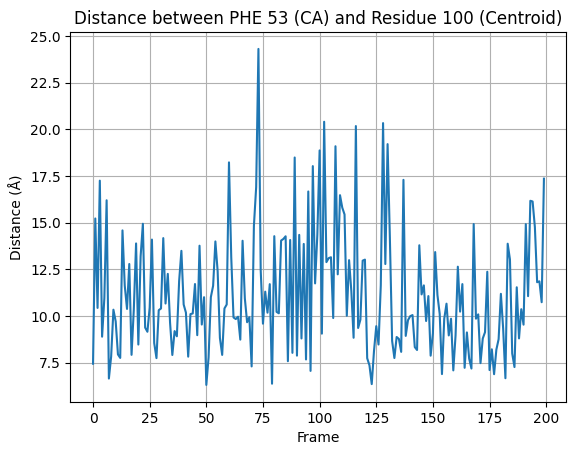

In [84]:
import matplotlib.pyplot as plt

plt.plot(distances_angstrom)
plt.xlabel("Frame")
plt.ylabel("Distance (Å)")
plt.title("Distance between PHE 53 (CA) and Residue 100 (Centroid)")
plt.grid(True)
plt.savefig(f'{data_path}/distrance_to_centroid_{state}.png', bbox_inches='tight', dpi=300)
plt.show()


In [85]:
import numpy as np

# Get CA atom index of PHE 53
res53_CA = [atom.index for atom in topology.residue(53).atoms if atom.name == 'CA'][0]

# Get all atom indices of residue 100
res100_atoms = [atom.index for atom in topology.residue(100).atoms]

# Store minimum distances per frame
min_distances = []

for frame in traj.xyz:
    ca_coord = frame[res53_CA]              # shape: (3,)
    ligand_coords = frame[res100_atoms]     # shape: (N_atoms, 3)

    # Compute all distances between CA and ligand atoms
    distances = np.linalg.norm(ligand_coords - ca_coord, axis=1)

    # Minimum distance
    min_distances.append(np.min(distances))

# Convert to Ångströms
min_distances_angstrom = np.array(min_distances) * 10

# Print or plot
print("Minimum distance (Å) between PHE 53 CA and any atom in residue 100:")
print(min_distances_angstrom)


Minimum distance (Å) between PHE 53 CA and any atom in residue 100:
[ 5.4654226  8.496548   7.220935  12.016809   6.9244757  9.217541
 14.077243   4.2263756  5.8523517  8.058923   6.882577   6.2789392
  7.3515344 10.785076   5.3498034  8.488872   8.097469   6.799049
  8.040132   7.5076175  5.1946545  6.314638  10.203099   7.7995687
  6.737488   7.8053284 11.431421   5.952068   5.232411   8.499487
  5.979349  11.945757   7.575521   6.8820024  5.7134624  5.3226376
  7.2123795  5.825479   8.158978   7.860202   8.757628   4.56413
  4.815703   6.4497514  7.611308   8.974058   7.2629266 11.366743
  6.2683415  4.56657    5.096114   4.73157    5.9529595  4.747263
  8.829052   6.861871   6.4985237  5.761401   7.9224496  6.0910845
 12.4940405  7.712252   6.615791   7.720628   7.129569   6.5128393
  8.002802   9.16638    4.1878953  6.4630036  5.255981   6.43357
  9.861736  19.299969   8.980603   4.346803   9.5914755  6.3281302
  7.436639   5.399713  10.961983   7.3906736  6.4083433  7.5833173
  6

In [ ]:
# Define bins and labels
bins = [0, 5, 10, 15, 20, np.inf]
labels = ['<5', '6-10', '11-15', '16-20', '>20']

# Categorize distances into bins
categories = np.digitize(min_distances_angstrom, bins) - 1
counts = [np.sum(categories == i) for i in range(len(labels))]

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(labels, counts, color='skyblue', edgecolor='black')
plt.title('Distribution of Distances between PHE 53 CA and Residue 100 Atoms')
plt.xlabel('Distance Range (Å)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()